### This is part 2 in this Topic Modelling series
- Look forward to initial topic analysis using k-means algorithm

In [21]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import MiniBatchKMeans

In [2]:
#importing the previously cleaned data
clean_data = pd.read_pickle("clean_data.pkl")
clean_data.info()
clean_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 3 columns):
id        568454 non-null int64
title     568454 non-null object
review    568454 non-null object
dtypes: int64(1), object(2)
memory usage: 13.0+ MB


,id,title,review
0,1,Good Quality Dog Food,buy vitality can dog food product good quality...
1,2,Not as Advertised,product arrive label jumbo salt peanut peanut...
2,3,"""Delight"" says it all",confection century light pillowy citrus gela...
3,4,Cough Medicine,secret ingredient robitussin addition root be...
4,5,Great taffy,great taffy great price wide assortment yummy...


We have all the cleaned reviews now. Lets divide these reviews into our training and testing sets. Since, we have the luxury of data, I'll split it 50/50.

In [3]:
training,testing = np.array_split(clean_data,2)
testing.reset_index(drop=True,inplace = True)

Before directly starting with our modelling process, I want to use k-means to familiarize with the information contained in the dataset. Lets perform k-means on the title of the reviews (it would be a good way to understand the kind of topics we should be looking forward in this data)

# K-Means

- Although k-means is more suited for text clustering (since it will give disjoint sets, that is, assign each document to single topic(cluster). In topic Modelling, usually, a document has many topics with varying probabilities.), we will start with k-means to obtain our initial topics, before moving onto complex models.

- K-means has a number of parameters that we can provide and tune. Since, the major requirement for the algorithm is to provide the number of clusters required (the number of topics), we need to know how many topics can be found in the data. For this, domain knowledge can play a crucial role and can help immmensely in getting the optimal number of clusters/topics.

- Since, we dont have that luxury here, we need to use some sort of metric based on which, we can find the optimal number of clusters. The common metrics used to understand how good the topics are apart from human interpretation, are coherence scores, perplexity and log-likelihood. Since, we dont plan to use k-means as our final model, we'll start with 10 topics and try to gain valuable insights out of them.

In [4]:
stop_words = ["a","able","about","above","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","after","afterwards","again","against","ah","all","almost","alone","along","already","also","although","always","am","among","amongst","an","and","announce","another","any","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","are","aren","arent","arise","around","as","aside","ask","asking","at","auth","available","away","awfully","b","back","be","became","because","become","becomes","becoming","been","before","beforehand","begin","beginning","beginnings","begins","behind","being","believe","below","beside","besides","between","beyond","biol","both","brief","briefly","but","by","c","ca","came","can","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","could","couldnt","d","date","did","didn't","different","do","does","doesn't","doing","done","don't","down","downwards","due","during","e","each","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","et-al","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","few","ff","fifth","first","five","fix","followed","following","follows","for","former","formerly","forth","found","four","from","further","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","had","happens","hardly","has","hasn't","have","haven't","having","he","hed","hence","her","here","hereafter","hereby","herein","heres","hereupon","hers","herself","hes","hi","hid","him","himself","his","hither","home","how","howbeit","however","hundred","i","id","ie","if","i'll","im","immediate","immediately","importance","important","in","inc","indeed","index","information","instead","into","invention","inward","is","isn't","it","itd","it'll","its","itself","i've","j","just","k","keep",	"keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","m","made","mainly","make","makes","many","may","maybe","me","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","more","moreover","most","mostly","mr","mrs","much","mug","must","my","myself","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","nor","normally","nos","not","noted","nothing","now","nowhere","o","obtain","obtained","obviously","of","off","often","oh","ok","okay","old","omitted","on","once","one","ones","only","onto","or","ord","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","owing","own","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","re","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","s","said","same","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","she","shed","she'll","shes","should","shouldn't","show","showed","shown","showns","shows","significant","significantly",
               "similar","similarly","since","six","slightly","so","some","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","such","sufficiently","suggest","sup","sure",	"t","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","these","they","theyd","they'll","theyre","they've","think","this","those","thou","though","thoughh","thousand","throug","through","throughout","thru","thus","til","tip","to","together","too","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","under","unfortunately","unless","unlike","unlikely","until","unto","up","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","very","via","viz","vol","vols","vs","w","want","wants","was","wasnt","way","we","wed","welcome","we'll","went","were","werent","we've","what","whatever","what'll","whats","when","whence","whenever","where","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","which","while","whim","whither","who","whod","whoever","whole","who'll","whom","whomever","whos","whose","why","widely","willing","wish","with","within","without","wont","words","world","would","wouldnt","www","x","y","yes","yet","you","youd","you'll","your","youre","yours","yourself","yourselves","you've","z","zero"]


In [5]:
#removing punctuation and numbers
def remove_punc(text):
    text = re.sub(r'\d+','',text)
    text = text.translate(str.maketrans('','',string.punctuation))
    return text
    

In [6]:
training.title = training.title.apply(remove_punc)

For k-means, we will consider unigrams, bi-grams and tri-grams in our feature space, and will only consider top 5000 terms. As far as weighing the terms go, we can use term frequency, TF-IDF or word2vec. I have used TF here.

In [7]:
#document-term matrix
docs = list(training.title)
vec = CountVectorizer(lowercase = True, stop_words = stop_words,ngram_range = (1,3),max_features = 5000)
X = vec.fit_transform(docs)
dtm = pd.DataFrame(X.toarray(),columns =vec.get_feature_names())
dtm.head()

C:\Users\pares\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'didn', 'doesn', 'don', 'hasn', 'haven', 'isn', 'll', 'shouldn', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,absolute,absolute best,absolute favorite,absolutely,absolutely best,absolutely delicious,absolutely love,absolutely perfect,absolutely wonderful,acai,...,zico,zico coconut,zico coconut water,zing,ziwipeak,zoe,zukes,zukes hip,zukes hip action,zukes mini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we have our matrix ready, lets use the elbow curve and silhouette method to understand how many topics are there.

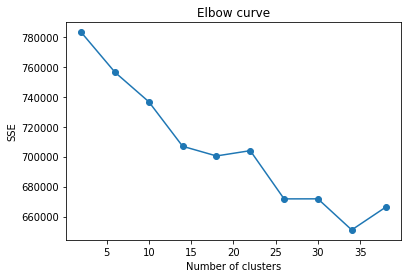

In [64]:
#I'll use mini-batch kmeans instead of regular k-means, since we are dealing with such large dataset, time complexity comes into
#the foray here
def optimal_cluster(df,start,end,step):
    clusters = range(start,end,step)
    SSE = []
    sil_score = []
    for k in range(start,end,step):
        k_means = MiniBatchKMeans(n_clusters = k,random_state = 32,batch_size = 100000).fit(df)
        SSE.append(k_means.inertia_)
        #preds = k_means.labels_
        #sil_score.append(silhouette_score(df,preds))
    plt.figure()
    plt.title("Elbow curve")
    plt.plot(clusters,SSE,marker = "o")
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    #plt.figure()
    #plt.title("Silhouette curve")
    #plt.plot(clusters,sil_score,marker = "o")
    #plt.xlabel("Number of clusters")
    #plt.ylabel("Silhouette score")
    #plt.show()
optimal_cluster(X,2,40,4)

So according to this, we should look for somewhere between 14 and 22 clusters. Lets start with 15 clusters and take it from there.

In [68]:
#Lets use the original k-means now 
k_means = KMeans(n_clusters = 15, random_state = 32).fit(X)

In [70]:
#Now, lets look at the top terms in each of these clusters
ordered_centers = k_means.cluster_centers_.argsort()[:,::-1]
terms = vec.get_feature_names()
print("--Top 10 terms per cluster--")
print("")
for i in range(15):
    top_words = []
    print("Cluster",i,":")
    for j in ordered_centers[i,:10]:
        top_words.append(terms[j])
    print(top_words)
    print("")

--Top 10 terms per cluster--

Cluster 0 :
['delicious', 'excellent', 'yummy', 'taste', 'dog', 'loves', 'product', 'favorite', 'better', 'food']

Cluster 1 :
['great', 'taste', 'coffee', 'price', 'great taste', 'great coffee', 'tea', 'snack', 'great price', 'flavor']

Cluster 2 :
['good', 'stuff', 'good stuff', 'product', 'good product', 'pretty', 'taste', 'pretty good', 'price', 'good price']

Cluster 3 :
['best', 'tea', 'coffee', 'ive', 'best coffee', 'best tea', 'tasting', 'best tasting', 'market', 'food']

Cluster 4 :
['flavor', 'good', 'good flavor', 'nice', 'favorite', 'favorite flavor', 'excellent', 'nice flavor', 'strong', 'love']

Cluster 5 :
['tea', 'green', 'green tea', 'good', 'favorite', 'good tea', 'excellent', 'great', 'delicious', 'stash']

Cluster 6 :
['decent', 'special', 'taste', 'treat', 'decent taste', 'price', 'special treat', 'product', 'decent product', 'food']

Cluster 7 :
['great', 'product', 'great product', 'price', 'product great', 'great price', 'great prod

Going through these words, there are a lot of adjectives here that might have been used to describe different products. These terms are not giving me any information about what the reviews are about. I'm going to add such words into my list of stopwords and build another model with new terms. 

In [76]:
domain1 = ["better","good","great","taste","expected","love","stuff","flavor","nice","best","product","pretty","price","tasty",
           "yummy","tasting","favourite","delicious","excellent","loves","em","pleasant","surprise","decent"]
stop_words.extend(domain1)

In [77]:
#document-term matrix
docs = list(training.title)
vec = CountVectorizer(lowercase = True, stop_words = stop_words,ngram_range = (1,3),max_features = 5000)
X = vec.fit_transform(docs)
dtm = pd.DataFrame(X.toarray(),columns =vec.get_feature_names())
dtm.head()

C:\Users\pares\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'didn', 'doesn', 'don', 'hasn', 'haven', 'isn', 'll', 'shouldn', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,absolute,absolute favorite,absolutely,absolutely amazing,absolutely fabulous,absolutely perfect,absolutely tea,absolutely wonderful,acai,acceptable,...,zip,zipfizz,ziwi,ziwipeak,zoe,zukes,zukes hip,zukes hip action,zukes mini,zukes mini naturals
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#Lets use the original k-means now 
k_means = KMeans(n_clusters = 15, random_state = 32).fit(X)

In [79]:
#Now, lets look at the top terms in each of these clusters
ordered_centers = k_means.cluster_centers_.argsort()[:,::-1]
terms = vec.get_feature_names()
print("--Top 10 terms per cluster--")
print("")
for i in range(15):
    top_words = []
    print("Cluster",i,":")
    for j in ordered_centers[i,:10]:
        top_words.append(terms[j])
    print(top_words)
    print("")

--Top 10 terms per cluster--

Cluster 0 :
['bad', 'coffee', 'packaging', 'batch', 'bad batch', 'bad packaging', 'tastes', 'coffee bad', 'tastes bad', 'aftertaste']

Cluster 1 :
['chips', 'potato', 'potato chips', 'kettle', 'pop chips', 'pop', 'salt', 'kettle chips', 'tortilla chips', 'tortilla']

Cluster 2 :
['food', 'dog', 'dog food', 'cat', 'cat food', 'baby', 'cats', 'baby food', 'dogs', 'dry']

Cluster 3 :
['tea', 'green', 'green tea', 'stash', 'iced', 'iced tea', 'black', 'herbal', 'chai', 'herbal tea']

Cluster 4 :
['quality', 'high', 'high quality', 'food', 'poor', 'poor quality', 'quality food', 'control', 'quality control', 'high quality food']

Cluster 5 :
['favorite', 'tea', 'favorite tea', 'coffee', 'treat', 'dogs', 'favorite treat', 'dogs favorite', 'favorite coffee', 'kcup']

Cluster 6 :
['snack', 'healthy', 'healthy snack', 'perfect', 'low', 'perfect snack', 'food', 'snack food', 'quick', 'protein']

Cluster 7 :
['gift', 'perfect', 'perfect gift', 'basket', 'gift basket'

Wow! This is quite useful information we got here. Each of these topics are quite coherent. Lets visualize these words.

These are just the top 10 words. Lets visualize each of these clusters through word clouds to get a better understanding of the underlying topics

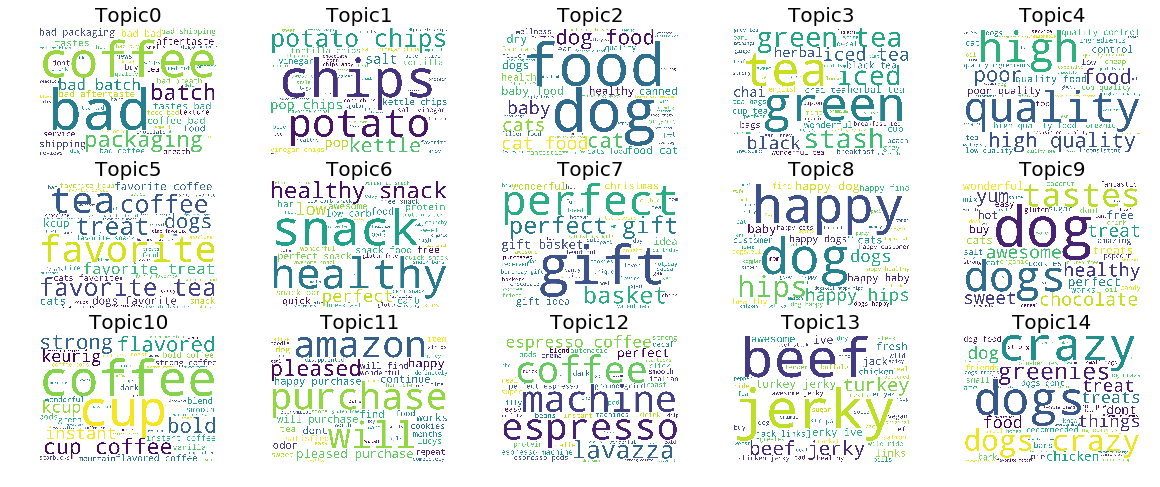

In [87]:
#getting color codes and establishing the word-cloud
#col_codes = list(mcolors.TABLEAU_COLORS.values())
cloud = WordCloud(background_color = "white",
                  prefer_horizontal = 1.0,width =2500,height = 1800)
#getting the top 50 words for each cluster based on k-means weightage
top_words = []
for clusters in range(15):
    cluster_words = []
    for words in ordered_centers[clusters,:50]:
        cluster_words.append(terms[words])
    top_words.append(cluster_words)
#making the word-cloud
fig,axes = plt.subplots(3,5,figsize = (20,8),sharex = True,sharey = True)
for ax in range(len(axes.flatten())):
    fig.add_subplot(axes.flatten()[ax])
    topic = Counter(top_words[ax])
    cloud.fit_words(topic)
    plt.imshow(cloud)
    plt.title("Topic"+str(ax),fontdict = dict(size=20))
    plt.axis("off")
plt.axis("off")
plt.show()

### How many documents are there for each cluster/topic?

In [89]:
temp = pd.DataFrame(columns = ["topic_no","top_keywords","number_of_documents","perc_docs"])
temp.topic_no = range(15)
for i in temp.topic_no:
    temp.number_of_documents[i] = Counter(k_means.labels_)[i]
    temp.top_keywords[i] = ','.join(top_words[i][:5])
for i in temp.topic_no:
    temp.perc_docs[i] = round(temp.number_of_documents[i]/temp.number_of_documents.sum(),4)
temp

C:\Users\pares\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pares\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pares\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,topic_no,top_keywords,number_of_documents,perc_docs
0,0,"bad,coffee,packaging,batch,bad batch",2479,0.0087
1,1,"chips,potato,potato chips,kettle,pop chips",2240,0.0079
2,2,"food,dog,dog food,cat,cat food",6223,0.0219
3,3,"tea,green,green tea,stash,iced",10195,0.0359
4,4,"quality,high,high quality,food,poor",2463,0.0087
5,5,"favorite,tea,favorite tea,coffee,treat",4760,0.0167
6,6,"snack,healthy,healthy snack,perfect,low",3698,0.013
7,7,"gift,perfect,perfect gift,basket,gift basket",923,0.0032
8,8,"happy,dog,hips,happy hips,dogs",1203,0.0042
9,9,"dog,dogs,tastes,chocolate,healthy",236699,0.8328


#### Reading through the top words from each cluster, one could make out the "theme" of each topic:
- Cluster 0: Bad Coffee
- Cluster 1: Chips
- Cluster 2: Animal Food
- Cluster 3: Tea(s)
- Cluster 4: Product Quality
- Cluster 5: Beverages
- Cluster 6: Healthy Snacks
- Cluster 7: Christmas Gifts
- Cluster 8: Dogs
- Cluster 9: Dogs
- Cluster 10: Coffee
- Cluster 11: Purchases
- Cluster 12: Coffee (espresso)
- Cluster 13: Beef Jerky/ Turkey
- Cluster 14: Dogs

There are a few overlapping clusters. But its a start.

### Key observations and take-aways:

- There is quite a chunk of documents about dogs and coffee(s).
- Some of the topics that we should expect in the reviews should be about Coffees, Tea(s), Animals and Animal Foods, Chips and Christmas gifts that includes chocolates.
- We should look forward to number of topics in the range 10-25.

#### Now that, we have an understanding of what to expect,we can move onto more advanced algorithms to understand our topics.